In [2]:
#imported the librarys needed
import pandas as pd
import geopandas as gpd

import json

import plotly.express as px
import plotly.graph_objs as go

import requests

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

import contextily as ctx

In [ ]:
#the hidden rows below include a list of all the charge types related to the "unsanctioned use" of public space

In [3]:
# Created a list of arrest types related to "unsanctioned use" of public space

public_drinking = ["25620BP", 
                   "25620BPC",
                   "25620BPLAMC",
                   "25620BP LAM",
                   "41.27 LAMC",
                   "41.27(C)LSM",
                   "41.27(CLAMC",
                   "41..27CLAMC",
                   "41.27)D)LAM",
                   "41.27()LAMC"]
                 
reckless_driving = ["23103(A)VC", 
                    "23103VC", 
                    "23103.5VC",
                    "23103A.4BVC",
                    "23103(A)VC",
                    "23103(B)VC",
                    "23103VC",
                    "22400(A)VC"]

vending = ["41.27CLAMC",
           "42.15G29LAM",
           "42.14.1LAMC",
           "42.45LAMC",
           "4219(A)LAMC",
           "42.15E9",
           "42.15(I)3LA",
           "42.15(E)5LA",
           "42.30 BP",
           "42.0(B)LAMC",
           "4218ALAMC",
           "42.00BLAMC",
           "42.00LAMC", 
           "42.00HLAMC", 
           "63.44",
           "63.44B(16)L",
           "63.44(B)3PC",
           "63.44D24LAM",
           "6344B26BLAM",
           "63.44(A)(14",
           "6344.44I9LA",
           "63.44(B)4BL",
           "63.4401LAMC",
           "63.44.B.14C",
    "42.00", 
"42.00 B LAMC", 
"42.00 LAMC", 
"42.00.1(B)", 
"42.00.1(D)LA", 
"42.00.1B", 
"42.00.1CLAMC", 
"42.00.1DLAMC", 
"42.00.1LAMC", 
"42.00(A)(1)L", 
"42.00(A)LAMC", 
"42.00(B)", 
"42.00(B)BLAM", 
"42.00(B)LAMC", 
"42.00(B)LAMN", 
"42.00(C)(1)", 
"42.00(C)(1)L", 
"42.00(C)1", 
"42.00(C)LAMC", 
"42.00(D)LAMC", 
"42.00(H)LAMC", 
"42.00(O)LAMC", 
"42.009B)LAMC", 
"42.00ALAMC", 
"42.00B", 
"42.00B LAMC", 
"42.00BLAMC", 
"42.00C1LAMC", 
"42.00CLAMC", 
"42.00DLAMC", 
"42.00GLAMC", 
"42.00HLAMC", 
"42.00LAMC", 
"63.44", 
"63.44 (B)", 
"63.44 19LAMC", 
"63.44 24B", 
"63.44 B 14 A", 
"63.44 B 14 B", 
"63.44 B 24", 
"63.44 B(14)A", 
"63.44 B14(A)", 
"63.44 B24LAM", 
"63.44 B26(D)", 
"63.44 B7LAM", 
"63.44 I 9 LA", 
"63.44 I9LAMC", 
"63.44 LAMC", 
"63.44.(B)(26", 
"63.44.04LAMC", 
"63.44.13.24", 
"63.44.14(B)(", 
"63.44.14B1LA", 
"63.44.14CLAM", 
"63.44.18LAMC", 
"63.44.23.DR", 
"63.44.23(D)4", 
"63.44.23LAMC", 
"63.44.24LAMC", 
"63.44.26O", 
"63.44.6.24LA", 
"63.44.B 2 C", 
"63.44.B.14", 
"63.44.B.14A", 
"63.44.B.14CL", 
"63.44.B.14LA", 
"63.44.B.20LA", 
"63.44.B.24", 
"63.44.B.24LA", 
"63.44.B(14)", 
"63.44.B14", 
"63.44.B14(A)", 
"63.44.B14A", 
"63.44.B14CLA", 
"63.44.B14LAM", 
"63.44.B17LAM", 
"63.44.B24", 
"63.44.B24LAM", 
"63.44.D.4.LA", 
"63.44.D.4LAM", 
"63.44.D14LAM", 
"63.44.D3LAMC", 
"63.44.D4LAMC", 
"63.44.I.9", 
"63.44.I.9LAM", 
"63.44.LAMC", 
"63.44((J)3LA", 
"63.44()B)14B", 
"63.44()B)19L", 
"63.44()B)24L", 
"63.44(0)1LAM", 
"63.44(1)(12)", 
"63.44(1)(9)", 
"63.44(1)(A)L", 
"63.44(1)12MC", 
"63.44(1)9LAM", 
"63.44(1)LAMC", 
"63.44(12)LAM", 
"63.44(23)D4L", 
"63.44(24)LAM", 
"63.44(26)(B)", 
"63.44(26)D", 
"63.44(6)24LA", 
"63.44(9)ILAM", 
"63.44(A)(1)", 
"63.44(A)(4)L", 
"63.44(A)14AL", 
"63.44(A)14BL", 
"63.44(A)1LAM", 
"63.44(A)24LA", 
"63.44(A)26LA", 
"63.44(A)LAMC", 
"63.44(B )14B", 
"63.44(B-14)", 
"63.44(B-14)C", 
"63.44(B)", 
"63.44(B) (24", 
"63.44(B) 14A", 
"63.44(B) 14C", 
"63.44(B)(1)", 
"63.44(B)(1)4", 
"63.44(B)(14)", 
"63.44(B)(14B", 
"63.44(B)(17)", 
"63.44(B)(2)", 
"63.44(B)(2)(", 
"63.44(B)(2)6", 
"63.44(B)(2)D", 
"63.44(B)(2)L", 
"63.44(B)(20)", 
"63.44(B)(24)", 
"63.44(B)(240", 
"63.44(B)(26)", 
"63.44(B)(3)L", 
"63.44(B)(4)", 
"63.44(B)(4)L", 
"63.44(B)(7)", 
"63.44(B)(7)L", 
"63.44(B)(C)", 
"63.44(B)(Z4)", 
"63.44(B)1.4A", 
"63.44(B)1(4)", 
"63.44(B)10LA", 
"63.44(B)12BL", 
"63.44(B)12LA", 
"63.44(B)13", 
"63.44(B)13LA", 
"63.44(B)14", 
"63.44(B)14 9", 
"63.44(B)14 A", 
"63.44(B)14 C", 
"63.44(B)14(4", 
"63.44(B)14(A", 
"63.44(B)14(B", 
"63.44(B)14(C", 
"63.44(B)146", 
"63.44(B)146L", 
"63.44(B)147B", 
"63.44(B)149L", 
"63.44(B)14A", 
"63.44(B)14AK", 
"63.44(B)14AL", 
"63.44(B)14B", 
"63.44(B)14BK", 
"63.44(B)14BL", 
"63.44(B)14BO", 
"63.44(B)14C", 
"63.44(B)14CL", 
"63.44(B)14DL", 
"63.44(B)14EL", 
"63.44(B)14FL", 
"63.44(B)14GL", 
"63.44(B)14LA", 
"63.44(B)14PC", 
"63.44(B)14PL", 
"63.44(B)14SL", 
"63.44(B)14XL", 
"63.44(B)16LA", 
"63.44(B)17", 
"63.44(B)17AL", 
"63.44(B)17LA", 
"63.44(B)18LA", 
"63.44(B)19", 
"63.44(B)19BL", 
"63.44(B)19LA", 
"63.44(B)1B4L", 
"63.44(B)1BLA", 
"63.44(B)20", 
"63.44(B)20LA", 
"63.44(B)21LA", 
"63.44(B)23D4", 
"63.44(B)24", 
"63.44(B)24;A", 
"63.44(B)242", 
"63.44(B)24AL", 
"63.44(B)24AM", 
"63.44(B)24BL", 
"63.44(B)24L", 
"63.44(B)24LA", 
"63.44(B)24LM", 
"63.44(B)24LS", 
"63.44(B)26", 
"63.44(B)26(C", 
"63.44(B)26(D", 
"63.44(B)26C", 
"63.44(B)26CL", 
"63.44(B)26D", 
"63.44(B)26DL", 
"63.44(B)26F1", 
"63.44(B)26LA", 
"63.44(B)2BLA", 
"63.44(B)2CLA", 
"63.44(B)2D", 
"63.44(B)2DLA", 
"63.44(B)2DLM", 
"63.44(B)2LAM", 
"63.44(B)2OLA", 
"63.44(B)3PC", 
"63.44(B)44", 
"63.44(B)44BL", 
"63.44(B)44LA", 
"63.44(B)4ALA", 
"63.44(B)4BLA", 
"63.44(B)4LAM", 
"63.44(B)8LAM", 
"63.44(B)ALAM", 
"63.44(B)B14L", 
"63.44(B)B26D", 
"63.44(B)D14L", 
"63.44(B)D4LA", 
"63.44(B)H(A)", 
"63.44(B)I9LA", 
"63.44(B)LA", 
"63.44(B)LAMC", 
"63.44(B)PC", 
"63.44(B014BL", 
"63.44(B024LA", 
"63.44(B0LAMC", 
"63.44(B14)C", 
"63.44(BA)24L", 
"63.44(BO14BL", 
"63.44(BO24LA", 
"63.44(C)14(C", 
"63.44(C)LAMC", 
"63.44(C0LAMC", 
"63.44(D)", 
"63.44(D)(1)L", 
"63.44(D)(14)", 
"63.44(D)(24)", 
"63.44(D)(4)", 
"63.44(D)(4)L", 
"63.44(D)(4)M", 
"63.44(D)11LA", 
"63.44(D)14AL", 
"63.44(D)14BL", 
"63.44(D)14LA", 
"63.44(D)24LA", 
"63.44(D)4", 
"63.44(D)44", 
"63.44(D)4LAM", 
"63.44(D)4LAN", 
"63.44(D)ALAM", 
"63.44(D)LAMC", 
"63.44(D)R", 
"63.44(E)9LAM", 
"63.44(F)LAMC", 
"63.44(H)LAMC", 
"63.44(I)(12)", 
"63.44(I)(9)", 
"63.44(I)(9)L", 
"63.44(I)(A)", 
"63.44(I)(A)L", 
"63.44(I)0LAM", 
"63.44(I)12", 
"63.44(I)12LA", 
"63.44(I)13C", 
"63.44(I)13CL", 
"63.44(I)13DL", 
"63.44(I)13LA", 
"63.44(I)19LA", 
"63.44(I)3LAM", 
"63.44(I)4LAM", 
"63.44(I)9", 
"63.44(I)9BLA", 
"63.44(I)9KAN", 
"63.44(I)9LAI", 
"63.44(I)9LAM", 
"63.44(I)9LAN", 
"63.44(I)ALAM", 
"63.44(I)LAMC", 
"63.44(I)PLAM", 
"63.44(J)12LA", 
"63.44(J)3LAM", 
"63.44(K)(2)", 
"63.44(K)(2)L", 
"63.44(K2)LAM", 
"63.44(L)12", 
"63.44(L)12LA", 
"63.44(M)(2)L", 
"63.44(N)(3)", 
"63.44(N)1LAM", 
"63.44(N)3LAM", 
"63.44(N)ILAM", 
"63.44(O)ILAM", 
"63.44(O)LAMC", 
"63.44(S)(4)L", 
"63.44(V)24LA", 
"63.44)(B)24L", 
"63.44)B24LA", 
"63.440-4LAMC", 
"63.440.4LAMC", 
"63.4401LAMC", 
"63.4404LAMC", 
"63.440ILAMC", 
"63.441(9)", 
"63.441(B)13L", 
"63.44112LAMC", 
"63.4411ZLAMC", 
"63.4412LAMC", 
"63.4413LAMC", 
"63.4414ALAMC", 
"63.4414ALMAC", 
"63.4414B14", 
"63.4414BLAMC", 
"63.4414LAMC", 
"63.4419LAMC", 
"63.441ALAMC", 
"63.441BLAMC", 
"63.4424LAMC", 
"63.4426(D)", 
"63.4426C", 
"63.442DLAMC", 
"63.442LAMC", 
"63.444B3LAMC", 
"63.444LAMC", 
"63.44526DLAM", 
"63.445B26CLA", 
"63.44614ALAM", 
"63.44614LMC", 
"63.447(B)2DL", 
"63.448BLAMC", 
"63.449(B)24L", 
"63.449B)(7)", 
"63.449B)24LA", 
"63.449B)LAMC", 
"63.449B0(240", 
"63.449I)(9)", 
"63.44A14LAMC", 
"63.44A24LAMC", 
"63.44A3LAMC", 
"63.44ABLAMC", 
"63.44AIILAMC", 
"63.44ALAMC", 
"63.44ALAMD", 
"63.44B", 
"63.44B 14(A)", 
"63.44B 14(C)", 
"63.44B 149 L", 
"63.44B 14A", 
"63.44B 7LAMC", 
"63.44B LAMC", 
"63.44B.04CLA", 
"63.44B.14", 
"63.44B.14(A)", 
"63.44B.14(C)", 
"63.44B.14ALA", 
"63.44B.14C", 
"63.44B.14CLA", 
"63.44B.14LAM", 
"63.44B.24LAM", 
"63.44B(1)4LA", 
"63.44B(14)AL", 
"63.44B(14)B", 
"63.44B(14)BL", 
"63.44B(14)C", 
"63.44B(14)LA", 
"63.44B(14B)", 
"63.44B(16)LA", 
"63.44B(20)HS", 
"63.44B(24)", 
"63.44B(24)LA", 
"63.44B(26)D", 
"63.44B(A)LAM", 
"63.44B(B)24L", 
"63.44B1(4)AL", 
"63.44B10LAMC", 
"63.44B114A", 
"63.44B11LAMC", 
"63.44B124", 
"63.44B12LAMC", 
"63.44B13(A)", 
"63.44B13LAMC", 
"63.44B14", 
"63.44B14(A)", 
"63.44B14(A)L", 
"63.44B14(B)", 
"63.44B14(B)L", 
"63.44B14(C)", 
"63.44B14(C)L", 
"63.44B14(F)", 
"63.44B141LAM", 
"63.44B146", 
"63.44B146LAM", 
"63.44B14A", 
"63.44B14AAMC", 
"63.44B14ALAC", 
"63.44B14ALAM", 
"63.44B14ALAN", 
"63.44B14ALMA", 
"63.44B14ALMC", 
"63.44B14B", 
"63.44B14BALA", 
"63.44B14BLAM", 
"63.44B14BP", 
"63.44B14C", 
"63.44B14CALA", 
"63.44B14CLAM", 
"63.44B14CMC", 
"63.44B14D", 
"63.44B14DLAM", 
"63.44B14LAM", 
"63.44B14LAMC", 
"63.44B14LAMD", 
"63.44B14LLAM", 
"63.44B14PC", 
"63.44B14RLAM", 
"63.44B16LAMC", 
"63.44B17", 
"63.44B17LAMC", 
"63.44B18LAMC", 
"63.44B19", 
"63.44B19LAM", 
"63.44B19LAMC", 
"63.44B1ALAMC", 
"63.44B1LAMC", 
"63.44B2", 
"63.44B2(D)", 
"63.44B2(D)LA", 
"63.44B20LAMC", 
"63.44B21LAMC", 
"63.44B22", 
"63.44B22LAMC", 
"63.44B23LAMC", 
"63.44B24", 
"63.44B24 LAM", 
"63.44B24A", 
"63.44B24ALAM", 
"63.44B24B", 
"63.44B24CLAM", 
"63.44B24LAM", 
"63.44B24LAMC", 
"63.44B24LANC", 
"63.44B24PC", 
"63.44B25LAMC", 
"63.44B26(B)", 
"63.44B26(C)", 
"63.44B26(C)L", 
"63.44B26(D)", 
"63.44B26(D)L", 
"63.44B26(D)M", 
"63.44B260LAM", 
"63.44B26ALAM", 
"63.44B26BLAM", 
"63.44B26C", 
"63.44B26CLAM", 
"63.44B26D", 
"63.44B26DLAM", 
"63.44B26F1LA", 
"63.44B26LAM", 
"63.44B26LAMC", 
"63.44B26SLAM", 
"63.44B27LAMC", 
"63.44B29LAMC", 
"63.44B2ALAMC", 
"63.44B2D", 
"63.44B2DLAMC", 
"63.44B2HLAMC", 
"63.44B2LAMC", 
"63.44B2LAMCM", 
"63.44B3", 
"63.44B35LAMC", 
"63.44B3LAMC", 
"63.44B44LAMC", 
"63.44B4ALAMC", 
"63.44B4BLAMC", 
"63.44B4CLAMC", 
"63.44B4LAMC", 
"63.44B54LAMC", 
"63.44B74CLAM", 
"63.44B74LAMC", 
"63.44B7LAMC", 
"63.44B8LAMC", 
"63.44B9LAMC", 
"63.44BA14LAM", 
"63.44BALAMC", 
"63.44BBLAMC", 
"63.44BC(D)LA", 
"63.44BC4", 
"63.44BCLAMC", 
"63.44BD4LAMC", 
"63.44BH", 
"63.44BHALAMC", 
"63.44BLAMC", 
"63.44BMBLAMC", 
"63.44BPC", 
"63.44BPCLAMC", 
"63.44BS4LAMC", 
"63.44BS6DLAM", 
"63.44CLAMC", 
"63.44D 4LAMC", 
"63.44D LAMC", 
"63.44D-4LAMC", 
"63.44D.4LAMC", 
"63.44D(4)", 
"63.44D(4)LAM", 
"63.44D1", 
"63.44D14LAMC", 
"63.44D1LAMC", 
"63.44D2", 
"63.44D24LAMC", 
"63.44D4", 
"63.44D4 LAMC", 
"63.44D44LAMC", 
"63.44D4LAM", 
"63.44D4LAMC", 
"63.44D4LAMCI", 
"63.44D5LAMC", 
"63.44D9", 
"63.44DFLAMC", 
"63.44DLAMC", 
"63.44FLAMC", 
"63.44HALAMC", 
"63.44I(9)LAM", 
"63.44I0LAMC", 
"63.44I12LAMC", 
"63.44I13(C)", 
"63.44I13C", 
"63.44I13LAMC", 
"63.44I9", 
"63.44I9 LAMC", 
"63.44I9LAMC", 
"63.44I9LAMCC", 
"63.44I9LAMCI", 
"63.44IALAMC", 
"63.44ILAMC", 
"63.44IV2LAMC", 
"63.44J3LACC", 
"63.44J3LAMC", 
"63.44K(2)HS", 
"63.44K(2)LAM", 
"63.44K2", 
"63.44K2LAMC", 
"63.44KBLAMC", 
"63.44KLAMC", 
"63.44L12LAMC", 
"63.44LAMC", 
"63.44M14LAMC", 
"63.44M3LAMC", 
"63.44N1LAMC", 
"63.44N3LAMC", 
"63.44N4LAMC", 
"63.44O4LAMC", 
"63.44R26C", 
"7.62.020LACC", 
"7.62020LACC", 
"80.73.3LAMC", 
"80.73(A)LAMC", 
"80.73(B)", 
"80.73(B)(2)", 
"80.73(B)(2)A", 
"80.73(B)(3)", 
"80.73(B)12A4", 
"80.73(B)2(4)", 
"80.73(B)2(A)", 
"80.73(B)21LA", 
"80.73(B)2A", 
"80.73(B)2A1", 
"80.73(B)2A1L", 
"80.73(B)2A4", 
"80.73(B)2AIL", 
"80.73(B)2ANL", 
"80.73(B)2D", 
"80.73(B)2F", 
"80.73(B)LAMC", 
"80.73(S)LAMC", 
"80.73A27LAMC", 
"80.73ALAMC", 
"80.73B(2)A(1", 
"80.73B1LAMC", 
"80.73B21LAMC", 
"80.73B291", 
"80.73B299LAM", 
"80.73B2A", 
"80.73B2A1", 
"80.73B2A1LAM", 
"80.73B2A1MC", 
"80.73B2A2AA", 
"80.73B2A2AAL", 
"80.73B2A3", 
"80.73B2A31", 
"80.73B2A4", 
"80.73B2A4LAM", 
"80.73B2ALAMC", 
"80.73B2CLAMC", 
"80.73B2F", 
"80.73B2FLAMC", 
"80.73B2G", 
"80.73B2LAMC", 
"80.73B2S", 
"80.73BLAMC", 
"80.73D2A1", 
"80.73LAMC"]

bball_instreet = ["56.16LAMC",
                  "56.16 LAMC"]

charge_types = public_drinking + reckless_driving + vending + bball_instreet

In [4]:
#imported the arrest data for the selected arrest types into a dataframe from the City of LA API
url = "https://data.lacity.org/resource/yru6-6re4.json?$limit=200000"
query_params = {'$where': 'charge in ("{}")'.format('","'.join(charge_types))}

In [5]:
response = requests.get(url, params=query_params)
response

<Response [200]>

In [6]:
arrest_df = pd.DataFrame.from_dict(response.json())
arrest_df.shape

(146163, 25)

In [7]:
#used the to_datetime function in Pandas to create a column that just has year (as opposed to the full arrest date)
arrest_df['arst_date'] = pd.to_datetime(arrest_df['arst_date'])
arrest_df['year'] = arrest_df['arst_date'].dt.year

#selected columns to keep 
columns_to_keep = ['chrg_desc', 'lat', 'lon', 'charge', 'year','rpt_id']
arrest_df = arrest_df[columns_to_keep]

#Printed the first few rows of the dataframe and ensure the output had just those columns of interest. 
arrest_df.head()

chrg_desc      lat        lon       charge  \
0            IMPEDING NORMAL FLOW OF TRAFFIC  34.0994  -118.3005   22400(A)VC   
1            IMPEDING NORMAL FLOW OF TRAFFIC  34.0637  -118.2856   22400(A)VC   
2                                        NaN  33.9637  -118.3003    23103.5VC   
3                                        NaN  34.1278  -118.1929    23103.5VC   
4  RECKLESS DRIVING HWY BODILY INJ PRIOR CON   34.241  -118.5623  23103A.4BVC   

   year     rpt_id  
0  2010  101124290  
1  2011    2610505  
2  2010    2444545  
3  2018    5230476  
4  2015    4394835

In [8]:
# created a dataframe with our neighborhoods (defined by census block group)
df_blocks = pd.read_csv('target_fips.csv', 
                                   dtype=
                                   {'geoid':str,
                                         }
                                  )

#created list of our census tracts (from the list of block groups)
df_blocks['geoid'] = df_blocks['geoid'].str[0:-4] #deleted the last 4 of the block group code
df_blocks = df_blocks.drop_duplicates(subset=['geoid']) #dropped the duplicates
df_blocks.head()

geoid  cr_geoid      name original_id  pop100  hu100  \
0   06037195710       501  Westlake    westlake       0      0   
6   06037195802       501  Westlake    westlake       0      0   
21  06037195903       501  Westlake    westlake       0      0   
22  06037208001       501  Westlake    westlake    1131    458   
26  06037208301       501  Westlake    westlake       0      0   

    state_place_fips  
0             644000  
6             644000  
21            644000  
22            644000  
26            644000

In [9]:
df_blocks.shape

(112, 7)

In [10]:
tracts=gpd.read_file('Census_Tracts_2020-Copy1.geojson') # imported census tract data with polygon information
tracts['geoid'] ='06' + '037' + tracts['CT20'] #added a geoid column to match other dataframe
tracts.head() #checked sample of data

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0         1  101110  1011.10  1.229562e+07   15083.854287   
1         2  101122  1011.22  2.845774e+07   31671.455844   
2         3  101220  1012.20  7.522093e+06   12698.783810   
3         4  101221  1012.21  3.812000e+06    9161.710543   
4         5  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry        geoid  
0  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110  
1  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122  
2  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220  
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221  
4  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222

In [11]:
tracts_df_target=df_blocks.merge(tracts, on = "geoid", how = "left") #merged the target neighborhood & polygon data
tracts_df_target.shape

(112, 13)

In [12]:
neighborhoods = tracts_df_target[tracts_df_target['name'].notna()] #dropped all the NaN rows
neighborhoods['geoid'].value_counts() #checked the count of census tracts before the merge

06037195710    1
06037195802    1
06037218701    1
06037980009    1
06037195300    1
              ..
06037211123    1
06037211121    1
06037210010    1
06037209520    1
06037214501    1
Name: geoid, Length: 112, dtype: int64

In [13]:
#convert census tract data to a geodataframe and reprojected
neighborhoods = gpd.GeoDataFrame(neighborhoods, 
                         crs='EPSG:4326',
                         geometry=neighborhoods['geometry'])

neighborhoods = neighborhoods.to_crs(epsg=3857)

In [14]:
#convert arrest data to a geodataframe
arrest_gdf = gpd.GeoDataFrame(arrest_df, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(arrest_df.lon, arrest_df.lat))

arrest_gdf = arrest_gdf.to_crs(epsg=3857)
arrest_gdf.lon = arrest_df.lon.astype('float')
arrest_gdf.lat = arrest_df.lat.astype('float')

#drop the unmapped rows
arrest_gdf = arrest_gdf[arrest_gdf.lon!=0]

In [15]:
arrest_gdf.shape #checked shape of arrest_gdf prior to merge

(146063, 7)

In [16]:
#joined the geodataframes
join = gpd.sjoin(neighborhoods, arrest_gdf, how='right')

In [17]:
#dropped all the records that are not within our neighborhoods 
arrests_df = join[join['name'].notna()]

In [18]:
arrests_df.shape #checked the shape of the join

(20988, 20)

In [19]:
arrests_df.sample(2)

index_left        geoid  cr_geoid      name original_id  pop100  \
123699        14.0  06037208801     501.0  Westlake    westlake    15.0   
142962        14.0  06037208801     501.0  Westlake    westlake    15.0   

        hu100  state_place_fips  OBJECTID    CT20    LABEL   ShapeSTArea  \
123699    5.0          644000.0     620.0  208801  2088.01  2.889587e+06   
142962    5.0          644000.0     620.0  208801  2088.01  2.889587e+06   

        ShapeSTLength chrg_desc      lat       lon       charge  year  \
123699    7802.252435       NaN  34.0580 -118.2759   42.00BLAMC  2015   
142962    7802.252435       NaN  34.0601 -118.2761  63.44D4LAMC  2019   

           rpt_id                           geometry  
123699  150207986  POINT (-13166412.961 4036592.670)  
142962  190208548  POINT (-13166435.225 4036874.845)

In [20]:
#added a neighborhood_type column
at_risk = ['Westlake', 'Boyle Heights']
gentrifying = ['Jefferson Park', 'Lincoln Heights']
exclusionary = ['Los Feliz', "Fairfax"] 

arrests_df.loc[arrests_df['name'].isin(at_risk), 'neighborhood_type'] = 'At Risk'
arrests_df.loc[arrests_df['name'].isin(gentrifying), 'neighborhood_type'] = 'Gentrifying'
arrests_df.loc[arrests_df['name'].isin(exclusionary), 'neighborhood_type'] = 'Exclusionary'

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [21]:
arrests_df.sample(2) #checked to ensure the new column populated correctly

index_left        geoid  cr_geoid       name original_id  pop100  \
133674        74.0  06037189300     365.0  Los Feliz   los-feliz   215.0   
124869        30.0  06037209520     501.0   Westlake    westlake   320.0   

        hu100  state_place_fips  OBJECTID    CT20  ...   ShapeSTArea  \
133674   88.0          644000.0     442.0  189300  ...  2.045035e+07   
124869  131.0          644000.0     636.0  209520  ...  2.488320e+06   

        ShapeSTLength                      chrg_desc      lat       lon  \
133674   25805.744719    PRESENT IN PARK AFTER HOURS  34.1077 -118.3096   
124869    6468.360713  ILLEGAL STREET/SIDEWALK SALES  34.0492 -118.2742   

             charge  year     rpt_id                           geometry  \
133674  63.44B14LAM  2015  150614317  POINT (-13170164.428 4043272.689)   
124869   42.00BLAMC  2013  130208999  POINT (-13166223.718 4035410.299)   

       neighborhood_type  
133674      Exclusionary  
124869           At Risk  

[2 rows x 21 columns]

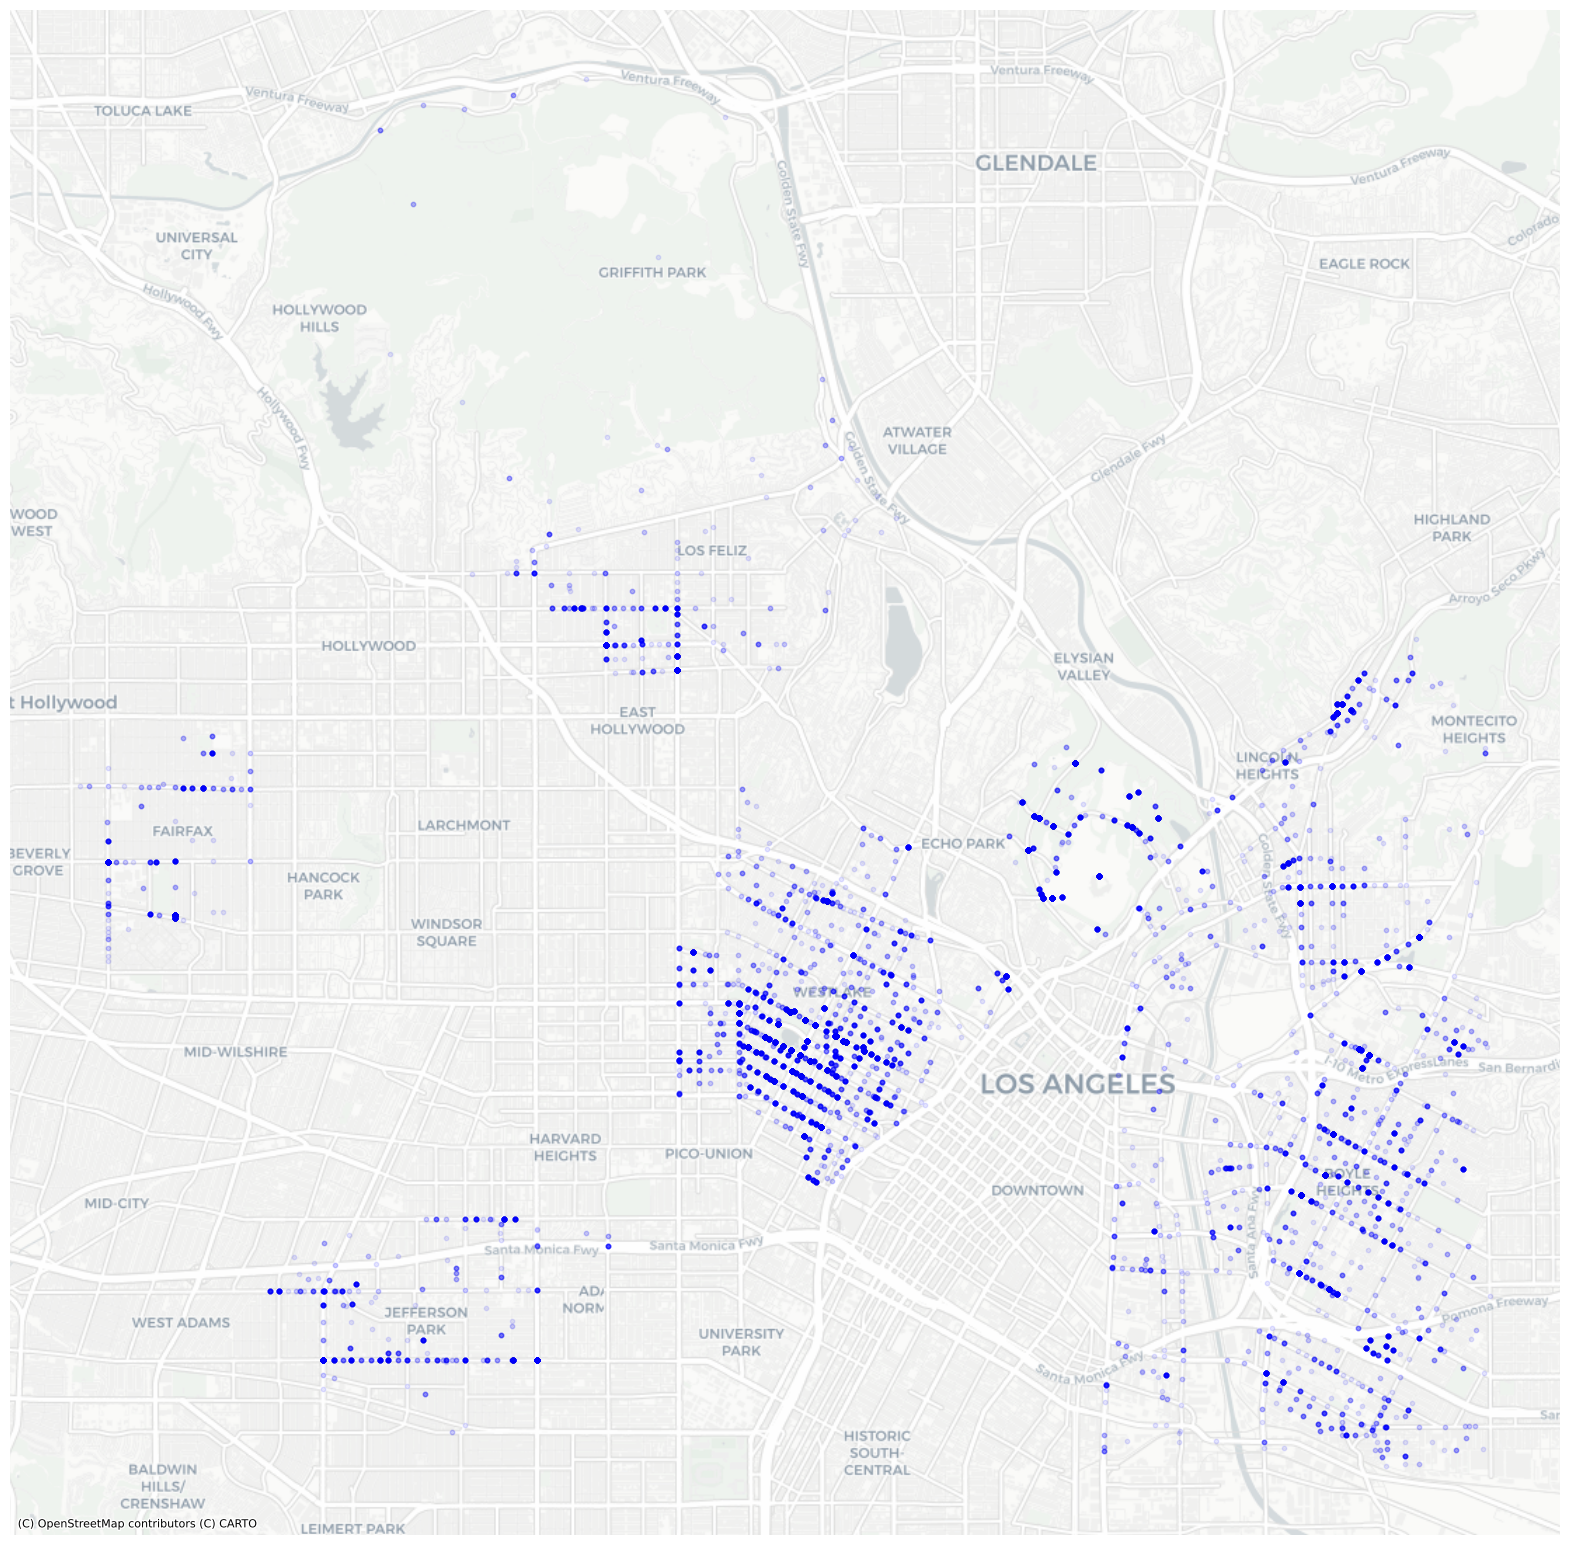

In [22]:
#mapped the data, finding that it looked like most arrests were in our at risk neighbrohoods 
fig,ax = plt.subplots(figsize=(20,20))

arrests_df.plot(ax=ax,
             color='blue',
             markersize=10, 
             alpha=0.1)
# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

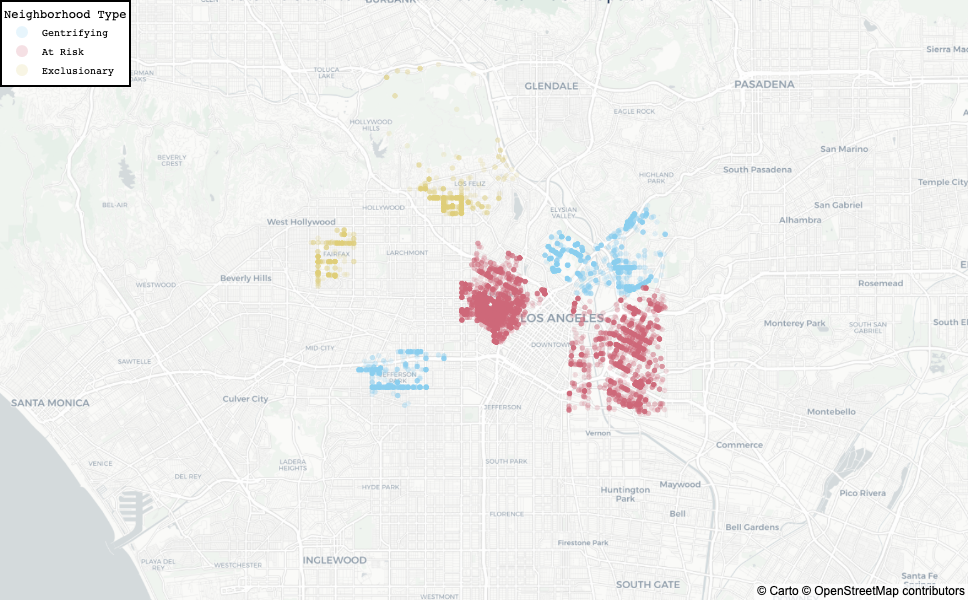

In [23]:
#mapped the data by neighborhood type to visually show what the above map indicated more clearly 

fig = px.scatter_mapbox(arrests_df,
                        lat='lat',
                        lon='lon',
                        zoom=10.5,
                        opacity=0.2,
                        color='neighborhood_type',
                        mapbox_style="carto-positron",
                        color_discrete_sequence = px.colors.qualitative.Safe,
                        category_orders={'neighborhood_type': ['Gentrifying','At Risk', 'Exclusionary']},
                        center=dict(
                            lat=34.060695018239,
                            lon=-118.28083936452524)
                       )

fig.update_layout(
    width = 1000,
    height = 600,
    title = "Arrests Related to Unsanctioned use of Public Space in 2010-2019",
    title_x=0.5,    
    legend=dict(
        title="Neighborhood Type", 
        itemsizing='constant',
        x=0,
        y=1,
        font=dict(
            family="Courier",
            size=10,
            color="black"
        ),
        bgcolor="White",
        bordercolor="Black",
        borderwidth=2
    ),
    margin = {'l':0, 'r':0, 'b':0, 't':0}
)

fig.show()

In [24]:
#Exported the final visual 
fig.write_html("arrests_by_neighborhood_new.html")